<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/00_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본 시계열 데이터 전처리 (결측치 및 이상치 처리)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

샘플 시계열 데이터 생성

In [2]:
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=100, freq="D")
values = np.random.randn(100).cumsum()  # 누적 합 형태의 시계열 데이터 생성
df = pd.DataFrame({"Date": dates, "Value": values})

결측치 삽입

In [3]:
df.loc[10:15, "Value"] = np.nan

결측치 처리 (선형 보간법 적용)

In [4]:
df["Value_Interpolated"] = df["Value"].interpolate(method="linear")

이상치 탐지 (IQR)

In [5]:
Q1 = df["Value_Interpolated"].quantile(0.25)
Q3 = df["Value_Interpolated"].quantile(0.75)
IQR = Q3 - Q1
outliers = (df["Value_Interpolated"] < (Q1 - 1.5 * IQR)) | (df["Value_Interpolated"] > (Q3 + 1.5 * IQR))

그래프 출력

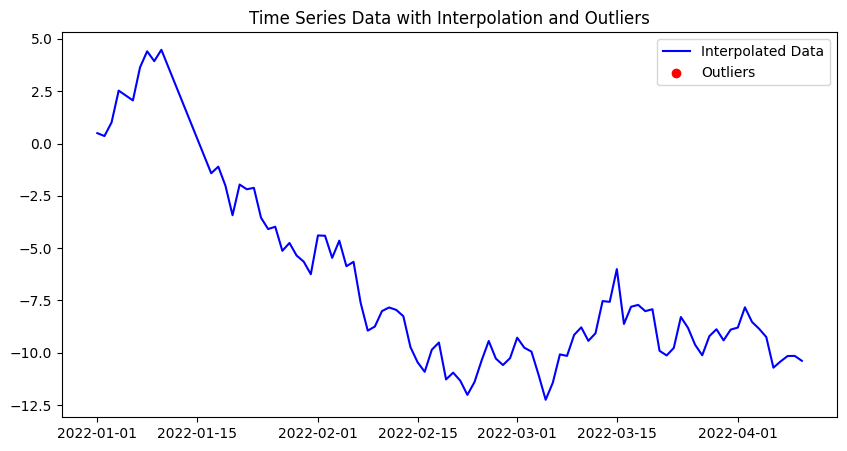

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Value_Interpolated"], label="Interpolated Data", color="blue")
plt.scatter(df["Date"][outliers], df["Value_Interpolated"][outliers], color="red", label="Outliers", zorder=3)
plt.title("Time Series Data with Interpolation and Outliers")
plt.legend()
plt.show()